In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os

# from ../utils/visualization import boxplot_by_category

# Set display options to show all columns
pd.set_option('display.max_columns', None)

# Set up white-grid plot style
sns.set_style("whitegrid")

# Optional: Set a color palette (you can choose a different one if you prefer)
sns.set_palette("deep")

CWD = os.getcwd()
print(f'CWD: {CWD}')

ROOT = os.path.abspath(os.path.dirname(os.path.dirname(CWD)))
sys.path.append(ROOT)

from utils.visualization import boxplot_by_category, stacked_barplot_by_category

CWD: /data_analysis/Insurance/src


In [2]:
PROJ = os.path.dirname(CWD)
PATH = os.path.join(PROJ, 'data', 'train.csv')

train = pd.read_csv(PATH, low_memory=False, na_values='?', index_col='id')
train.sample(5)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
6078208,Male,51,1,8.0,0,1-2 Year,Yes,60993.0,124.0,65,1
2433560,Female,24,1,9.0,1,< 1 Year,No,35205.0,152.0,270,0
7253884,Female,25,1,15.0,0,< 1 Year,Yes,36200.0,152.0,160,0
5969956,Female,28,1,45.0,1,< 1 Year,No,20991.0,152.0,59,0
10466135,Male,64,1,45.0,1,1-2 Year,No,28211.0,152.0,249,0


In [3]:
train.shape

(11504798, 11)

In [4]:
target = 'Response'
num_cols = ['Age', 'Annual_Premium', 'Vintage']
cat_cols = ['Gender', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Damage', 'Policy_Sales_Channel', 'Vehicle_Age']

train[cat_cols] = train[cat_cols].astype('category')
train.describe(include='all')

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,11504798,1.150480e+07,11504798.0,11504798.0,11504798.0,11504798,11504798,1.150480e+07,11504798.0,1.150480e+07,1.150480e+07
unique,2,NaN,2.0,54.0,2.0,3,2,NaN,152.0,NaN,NaN
top,Male,NaN,1.0,28.0,0.0,1-2 Year,Yes,NaN,152.0,NaN,NaN
freq,6228134,NaN,11482041.0,3451062.0,6178116.0,5982678,5783229,NaN,4166183.0,NaN,NaN
mean,NaN,3.838356e+01,NaN,NaN,NaN,NaN,NaN,3.046137e+04,NaN,1.638977e+02,1.229973e-01
std,NaN,1.499346e+01,NaN,NaN,NaN,NaN,NaN,1.645475e+04,NaN,7.997953e+01,3.284341e-01
min,NaN,2.000000e+01,NaN,NaN,NaN,NaN,NaN,2.630000e+03,NaN,1.000000e+01,0.000000e+00
25%,NaN,2.400000e+01,NaN,NaN,NaN,NaN,NaN,2.527700e+04,NaN,9.900000e+01,0.000000e+00
50%,NaN,3.600000e+01,NaN,NaN,NaN,NaN,NaN,3.182400e+04,NaN,1.660000e+02,0.000000e+00
75%,NaN,4.900000e+01,NaN,NaN,NaN,NaN,NaN,3.945100e+04,NaN,2.320000e+02,0.000000e+00


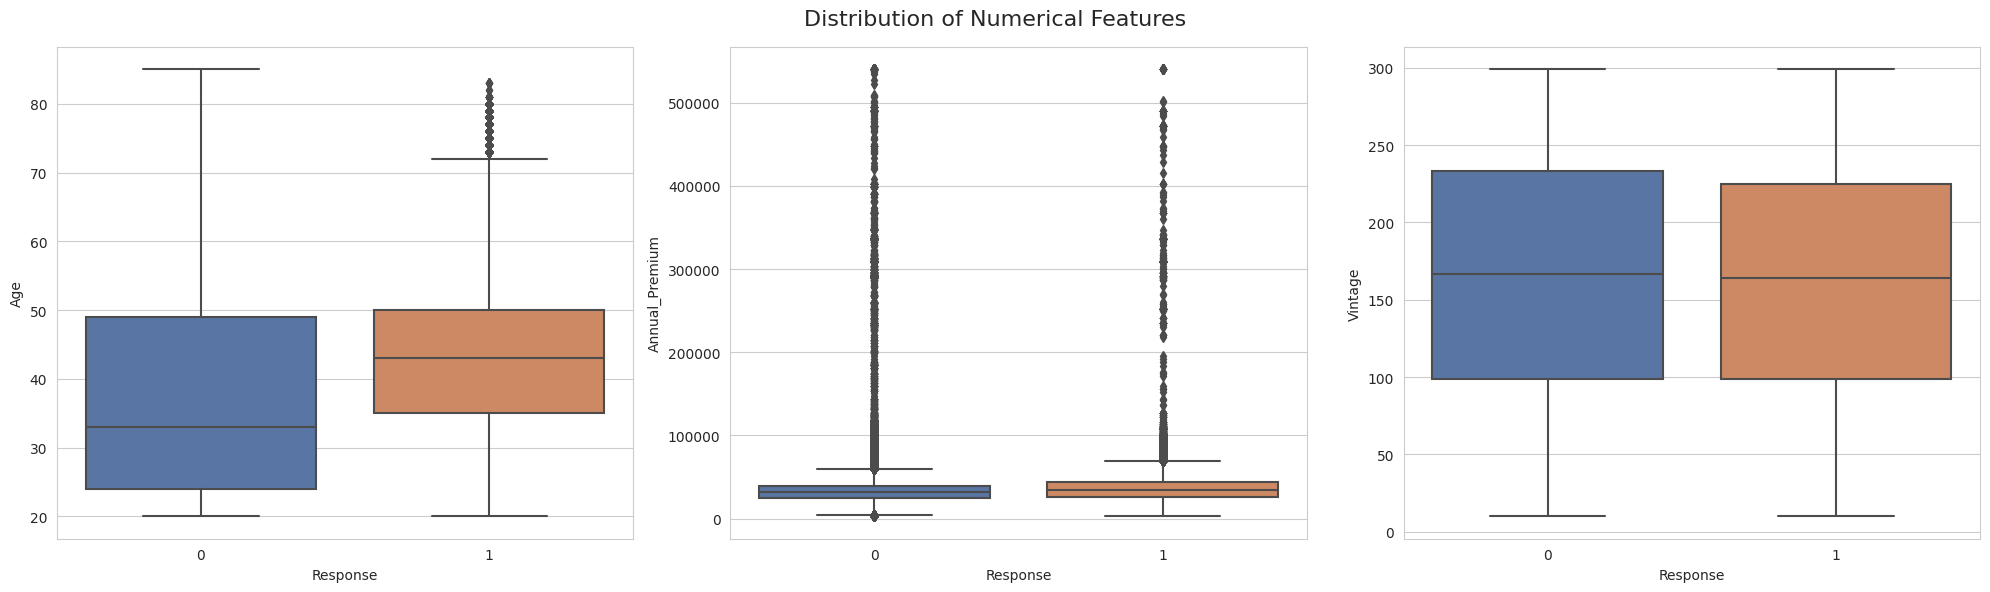

In [5]:
boxplot_by_category(train, num_cols, target, 'Distribution of Numerical Features')

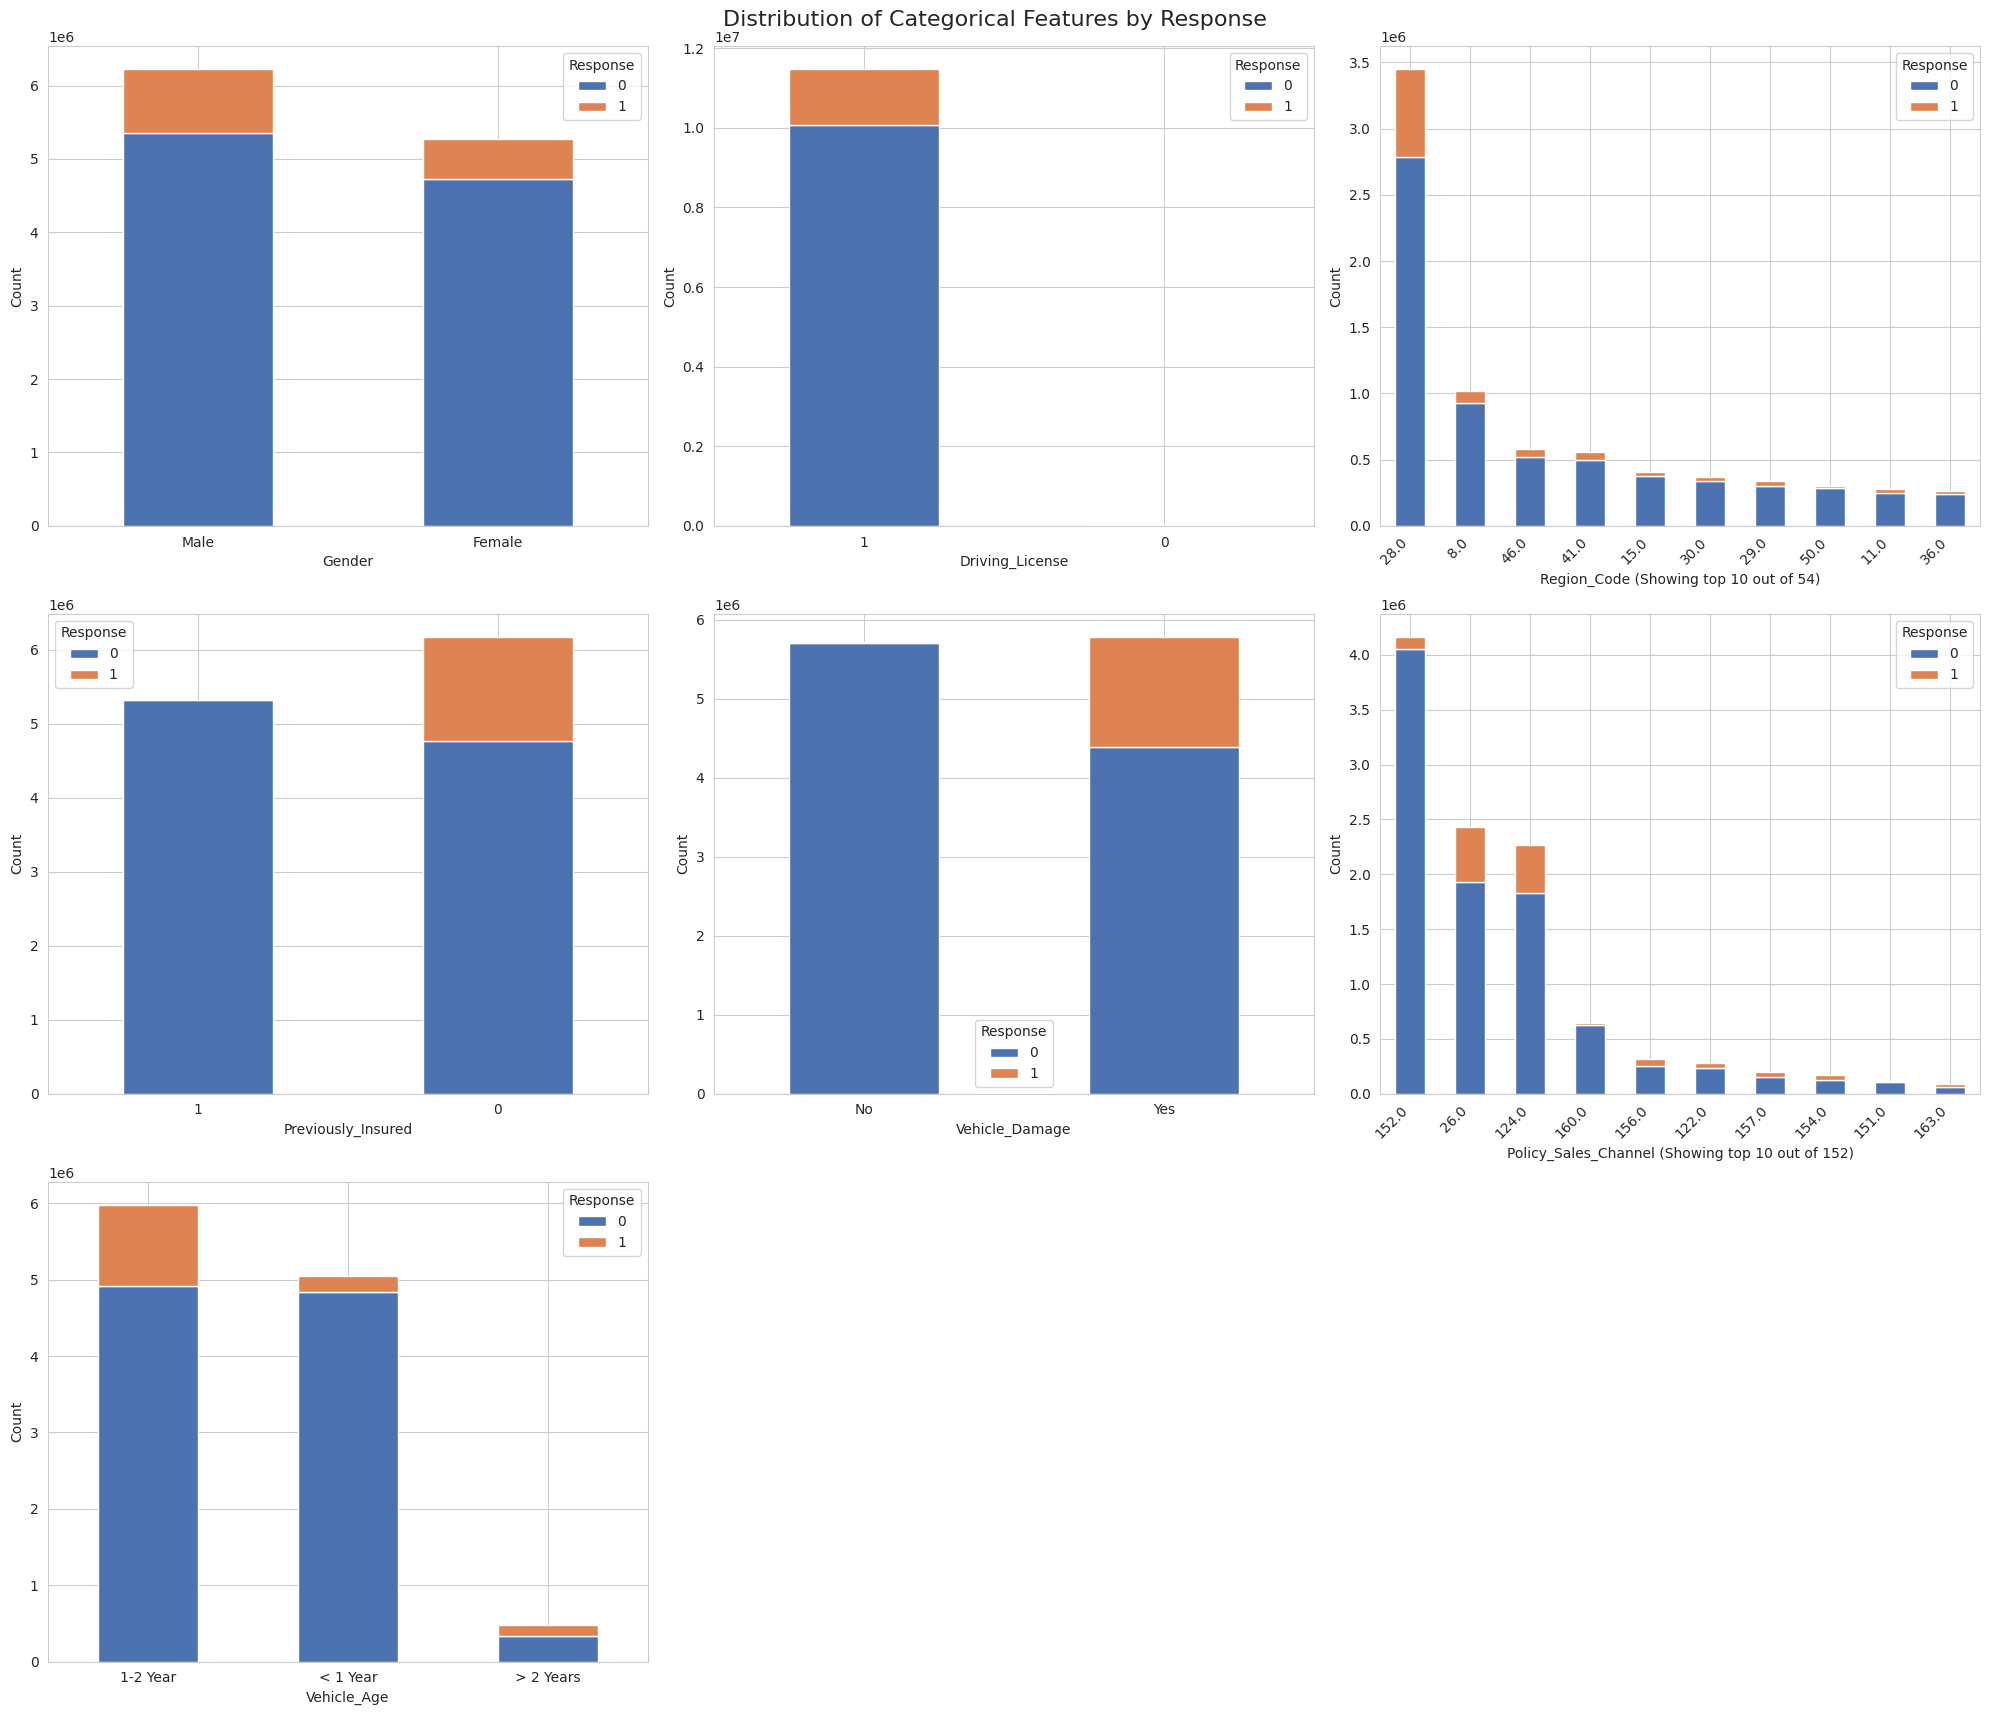

In [6]:
stacked_barplot_by_category(train, cat_cols, target, 'Distribution of Categorical Features by Response')

In [7]:
train.loc[(train['Driving_License']==0) &  (train['Response'] == 0)]

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
471,Male,51,0,15.0,1,1-2 Year,No,29130.0,26.0,221,0
605,Female,68,0,3.0,0,1-2 Year,No,33002.0,155.0,107,0
640,Male,71,0,28.0,1,1-2 Year,No,32732.0,26.0,257,0
1463,Male,59,0,45.0,1,1-2 Year,No,39262.0,124.0,282,0
1520,Male,52,0,8.0,0,1-2 Year,No,48647.0,26.0,134,0
...,...,...,...,...,...,...,...,...,...,...,...
11502248,Male,74,0,28.0,0,1-2 Year,Yes,46968.0,26.0,106,0
11502678,Male,65,0,18.0,0,1-2 Year,Yes,30818.0,26.0,102,0
11502804,Male,61,0,48.0,0,1-2 Year,Yes,2630.0,124.0,140,0
